In [ ]:
!pip install -q gradio

     |████████████████████████████████| 5.1 MB 30.7 MB/s 
     |████████████████████████████████| 272 kB 53.2 MB/s 
     |████████████████████████████████| 140 kB 51.7 MB/s 
     |████████████████████████████████| 54 kB 589 kB/s 
     |████████████████████████████████| 1.1 MB 32.2 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 2.3 MB 53.4 MB/s 
     |████████████████████████████████| 212 kB 46.0 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 57 kB 5.3 MB/s 
     |████████████████████████████████| 271 kB 74.6 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 144 kB 70.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 68 kB 4.9 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |██████████████████████████

In [ ]:
import gradio as gr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.optimizers import gradient_descent_v2
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 3

In [ ]:
# Load a dataset.
cozinha_dataset_path_1 = "gdrive/MyDrive/Master/dataset_objetos_cozinha_melhorado"

In [ ]:
!cp gdrive/MyDrive/Master/modelo_salvo/modelo_1_cozinha.h5 modelo_1_cozinha.h5

In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds_1 = tf.keras.preprocessing.image_dataset_from_directory(
  cozinha_dataset_path_1,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 468 files belonging to 3 classes.
Using 422 files for training.


In [ ]:
val_ds_1 = tf.keras.preprocessing.image_dataset_from_directory(
  cozinha_dataset_path_1,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 468 files belonging to 3 classes.
Using 46 files for validation.


In [ ]:
class_names_1 = train_ds_1.class_names
print(class_names_1)

['Copos', 'Pratos', 'Talheres']


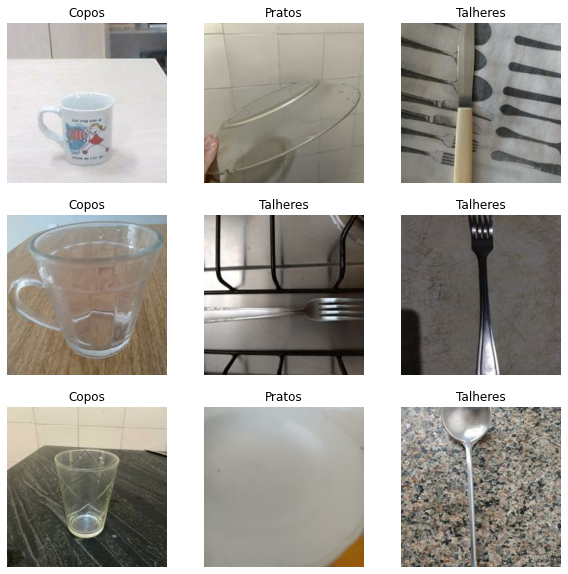

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_1[labels[i]])
    plt.axis("off")

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(224, 224),
  layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(30),
])

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds_1 = train_ds_1.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

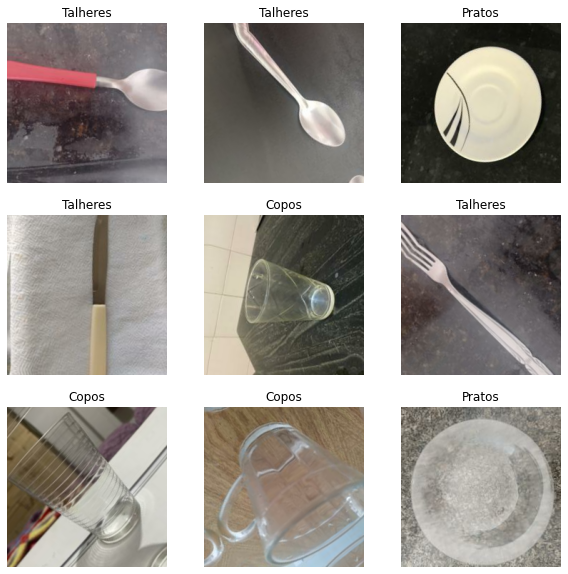

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_1[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
  layers.Dropout(0.1),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
  layers.Dropout(0.2),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
  layers.Dropout(0.3),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
  layers.Dropout(0.4),

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
  layers.Dropout(0.5),

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
  layers.Dropout(0.6),

  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(3, activation='softmax')
])

In [ ]:
model = keras.models.load_model('modelo_1_cozinha.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 16, 224, 3)        32272     
                                                                 
 batch_normalization_6 (Batc  (None, 16, 224, 3)       12        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 112, 2)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 112, 2)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 112, 2)        4640      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 112, 2)      

In [ ]:
model.load_weights("/content/modelo_1_cozinha.h5")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("m1_save_at_{epoch}.h5"),
]

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=100
history = model.fit(
  train_ds_1,
  validation_data=val_ds_1,
  epochs=epochs,
  callbacks=callbacks,
  batch_size=32
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 53s 3s/step - loss: 0.7338 - accuracy: 0.6967 - val_loss: 1.0072 - val_accuracy: 0.5652
Epoch 2/100
14/14 [==============================] - 3s 147ms/step - loss: 0.7433 - accuracy: 0.6991 - val_loss: 1.3359 - val_accuracy: 0.3696
Epoch 3/100
14/14 [==============================] - 3s 155ms/step - loss: 0.7673 - accuracy: 0.6754 - val_loss: 0.9833 - val_accuracy: 0.5435
Epoch 4/100
14/14 [==============================] - 3s 152ms/step - loss: 0.7560 - accuracy: 0.6493 - val_loss: 0.9751 - val_accuracy: 0.5870
Epoch 5/100
14/14 [==============================] - 3s 149ms/step - loss: 0.7129 - accuracy: 0.6825 - val_loss: 0.9536 - val_accuracy: 0.5870
Epoch 6/100
14/14 [==============================] - 3s 151ms/step - loss: 0.7271 - accuracy: 0.6754 - val_loss: 0.9044 - val_accuracy: 0.5652
Epoch 7/100
14/14 [==============================] - 3s 151ms/step - loss: 0.7442 - accuracy: 0.6777 - val_loss: 0.8816 - val_accuracy: 0.5870
Epoch 8/100
1

In [ ]:
!cp m1_save_at_100.h5 gdrive/MyDrive/Master/modelo_salvo/modelo_1_cozinha.h5

# 3.2

In [ ]:
# Load a dataset.
cozinha_dataset_path_2 = "gdrive/MyDrive/Master/dataset_objetos_cozinha_melhorado"

In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
  cozinha_dataset_path_2,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 468 files belonging to 3 classes.
Using 351 files for training.


In [ ]:
val_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
  cozinha_dataset_path_2,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 468 files belonging to 3 classes.
Using 117 files for validation.


In [ ]:
class_names_2 = train_ds_2.class_names
print(class_names_2)

['Copos', 'Pratos', 'Talheres']


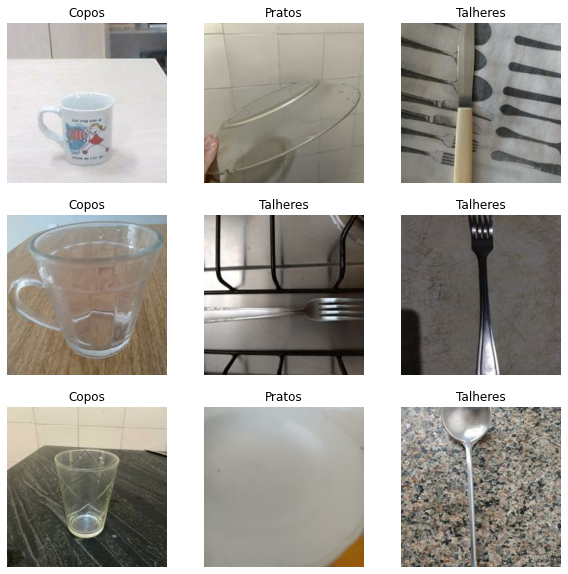

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_2.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_2[labels[i]])
    plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

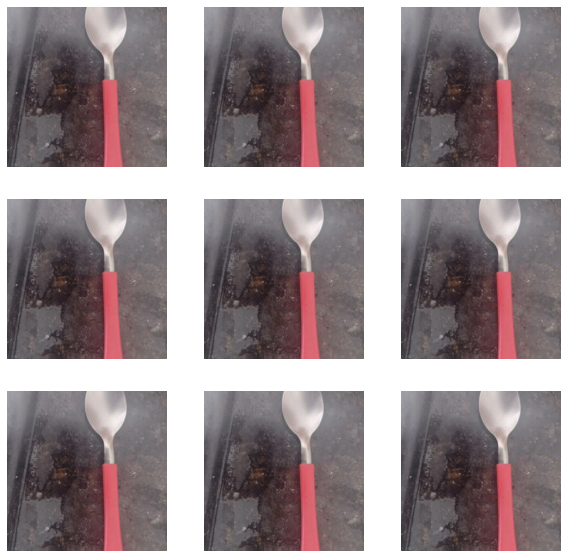

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds_2.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(padding='same'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(padding='same'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(padding='same'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation='softmax')
])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint("m2_save_at_{epoch}.h5"),
]

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 100
history = model.fit(
  train_ds_2,
  validation_data=val_ds_2,
  callbacks=callbacks,
  epochs=epochs
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 3s 112ms/step - loss: 1.0498 - accuracy: 0.5299 - val_loss: 1.0103 - val_accuracy: 0.5385
Epoch 2/100
11/11 [==============================] - 1s 52ms/step - loss: 1.0335 - accuracy: 0.5356 - val_loss: 1.0124 - val_accuracy: 0.5385
Epoch 3/100
11/11 [==============================] - 1s 50ms/step - loss: 1.0300 - accuracy: 0.5356 - val_loss: 1.0142 - val_accuracy: 0.5385
Epoch 4/100
11/11 [==============================] - 1s 53ms/step - loss: 1.0228 - accuracy: 0.5356 - val_loss: 1.0048 - val_accuracy: 0.5385
Epoch 5/100
11/11 [==============================] - 1s 57ms/step - loss: 1.0190 - accuracy: 0.5356 - val_loss: 1.0307 - val_accuracy: 0.5385
Epoch 6/100
11/11 [==============================] - 1s 53ms/step - loss: 1.0177 - accuracy: 0.5356 - val_loss: 1.0239 - val_accuracy: 0.5385
Epoch 7/100
11/11 [==============================] - 1s 55ms/step - loss: 1.0209 - accuracy: 0.5356 - val_loss: 1.0123 - val_accuracy: 0.5385
Epoch 8/100
11/11

In [ ]:
!cp m2_save_at_100.h5 gdrive/MyDrive/Master/modelo_salvo/modelo_2_cozinha.h5

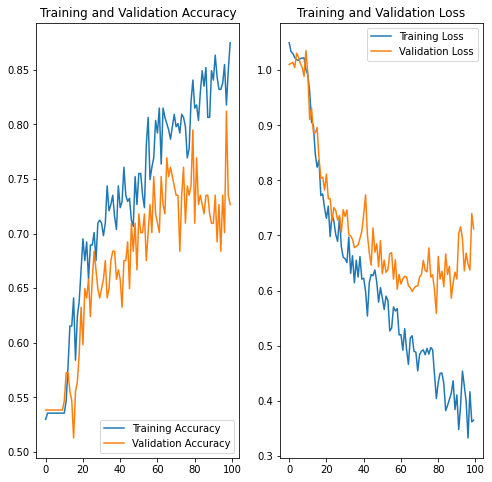

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from PIL import Image as im

def predict_image_1(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {class_names_1[i]: float(prediction[i]) for i in range(len(class_names_1))}

def predict_image_2(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {class_names_2[i]: float(prediction[i]) for i in range(len(class_names_2))}

In [ ]:
demo = gr.Blocks()

with demo:
    gr.Markdown("Selecione a quantidade de classes")
    with gr.Tabs():
        with gr.TabItem("3 Classes"):
          with gr.Row():
            image_input_1 = gr.inputs.Image(shape=(224,224))
            image_output_1 = gr.outputs.Label(num_top_classes=3)
            image_button_1 = gr.Button("Carregar")
        with gr.TabItem("3 Classes V2"):
          with gr.Row():
            image_input_2 = gr.inputs.Image(shape=(224,224))
            image_output_2 = gr.outputs.Label(num_top_classes=5)
            image_button_2 = gr.Button("Carregar")

    image_button_1.click(predict_image_1, inputs=image_input_1, outputs=image_output_1)
    image_button_2.click(predict_image_2, inputs=image_input_2, outputs=image_output_2)

demo.launch(debug='true')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://17238.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
